Text pipeline in agentic AI

In [2]:
from google.colab import drive
import zipfile, os

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
DATA_DIR = "/content/drive/MyDrive"

In [5]:
print("Files in MyDrive:", os.listdir(DATA_DIR))

Files in MyDrive: ['Tech M Project Progress', 'Tamanna_Resumes', 'Imagica Pics', 'Japan_Tech_M', 'MUFG SIH', 'Dataset files_MUFG_SIH.gdoc', 'Colab Notebooks', 'processed']


In [6]:
DATA_DIR = "/content/drive/MyDrive/MUFG SIH"

In [7]:
print("Files in MUFG SIH:", os.listdir(DATA_DIR))

Files in MUFG SIH: ['email_phishing_dataset.zip', 'Dataset files_MUFG_SIH.gdoc', 'AgenticAI_approach.svg', 'Deepfake_video.zip', 'MUFG', 'SIH2025_Presentation.pptx.pdf', 'Deepfake_audio.zip', 'phishnet', 'processed', 'processed_audio_mfcc.csv', '02_intake_classification.ipynb', 'processed_video', 'models', 'models_audio', 'logs', 'deepfake_video', 'deepfake_video_subset', 'video_pipeline_visualizations.ipynb', 'audio_visuals_greenIT.ipynb', '01_data_preprocessing .ipynb', '03_text_pipeline_agentic.ipynb']


In [8]:
text_out  = "/content/email_phishing_dataset"

In [9]:
os.makedirs(text_out, exist_ok=True)


In [10]:
with zipfile.ZipFile(f"{DATA_DIR}/email_phishing_dataset.zip", 'r') as z:
    z.extractall(text_out)

In [16]:
print("✅ Extraction complete")
print("Text files:", len(os.listdir(text_out)))

✅ Extraction complete
Text files: 7


In [13]:
# ===== Fix environment versions (Colab) =====
# 1) keep NumPy < 2
!pip install -q "numpy<2"

# 2) match torch / torchaudio / torchvision (CUDA 12.6 build that Colab uses)
!pip install -q torch==2.8.0 torchaudio==2.8.0 torchvision==0.23.0 --extra-index-url https://download.pytorch.org/whl/cu126

# 3) core libs for our pipelines
!pip install -q transformers==4.44.2 regex tldextract urlextract textstat \
                 librosa==0.10.2.post1 soundfile scikit-learn==1.5.2 pandas==2.2.2 tqdm

print("✅ Installed. Now go to: Runtime -> Restart runtime")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.4/563.4 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.8/485.8 kB 35.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtune 0.6.1 requires datasets, which is not installed.
✅ Installed. Now go to: Runtime -> Restart runtime


In [14]:
!pip uninstall -y transformers huggingface_hub safetensors

Found existing installation: transformers 4.44.2
Uninstalling transformers-4.44.2:
  Successfully uninstalled transformers-4.44.2
Found existing installation: huggingface-hub 0.35.0
Uninstalling huggingface-hub-0.35.0:
  Successfully uninstalled huggingface-hub-0.35.0
Found existing installation: safetensors 0.6.2
Uninstalling safetensors-0.6.2:
  Successfully uninstalled safetensors-0.6.2


In [15]:
!pip uninstall -y transformers huggingface-hub safetensors accelerate peft datasets diffusers

In [16]:
!pip uninstall -y gradio gcsfs
!pip install -q \
  "transformers==4.44.2" \
  "huggingface-hub==0.24.6" \
  "safetensors==0.4.5" \
  "accelerate==0.34.2" \
  "peft==0.12.0" \
  "datasets==3.0.2" \
  "diffusers==0.30.2" \
  "fsspec==2024.9.0"


Found existing installation: gradio 5.44.1
Uninstalling gradio-5.44.1:
  Successfully uninstalled gradio-5.44.1
Found existing installation: gcsfs 2025.3.0
Uninstalling gcsfs-2025.3.0:
  Successfully uninstalled gcsfs-2025.3.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.8/434.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.19.0 requires gcsfs!=202

In [17]:
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM

# check torch & cuda
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

# Quick HF test: sentiment analysis pipeline
sentiment = pipeline("sentiment-analysis")
print("Test sentiment:", sentiment("I love using HuggingFace Transformers!"))


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Torch version: 2.8.0+cu126
CUDA available: False


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Test sentiment: [{'label': 'POSITIVE', 'score': 0.9898301959037781}]


/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [18]:
import pandas as pd
import os

# Path to preprocessed email dataset
TEXT_DIR = "/content/email_phishing_dataset"

dfs = []
for fname in os.listdir(TEXT_DIR):
    if fname.endswith(".csv"):
        fpath = os.path.join(TEXT_DIR, fname)
        try:
            # ✅ FIX: removed errors= argument
            df = pd.read_csv(fpath, encoding="utf-8")
            df["source_file"] = fname   # keep origin
            dfs.append(df)
            print(f"✅ Loaded {fname} with {len(df)} rows")
        except Exception as e:
            print(f"⚠️ Skipping {fname}: {e}")

# ✅ Only concat if we got at least one dataframe
if dfs:
    df_emails = pd.concat(dfs, ignore_index=True)
    print("\n=== Dataset Summary ===")
    print("Total rows:", len(df_emails))
    print("Columns:", df_emails.columns.tolist())
    print(df_emails.head())
else:
    print("❌ No CSVs loaded. Please check file format.")


✅ Loaded Ling.csv with 2859 rows
✅ Loaded phishing_email.csv with 82486 rows
✅ Loaded Nigerian_Fraud.csv with 3332 rows
✅ Loaded Enron.csv with 29767 rows
✅ Loaded SpamAssasin.csv with 5809 rows
✅ Loaded Nazario.csv with 1565 rows
✅ Loaded CEAS_08.csv with 39154 rows

=== Dataset Summary ===
Total rows: 164972
Columns: ['subject', 'body', 'label', 'source_file', 'text_combined', 'sender', 'receiver', 'date', 'urls']
                                             subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                                body  label source_file  \
0  content - length : 3386 apple-iss research cen...      0    Ling.csv   
1  lang classification grimes , joseph e . and ba...      0    Ling.csv   
2  i am posting th

In [19]:
# Merge subject + body (if present)
if "subject" in df_emails.columns and "body" in df_emails.columns:
    df_emails["text"] = (
        df_emails["subject"].fillna("") + " " + df_emails["body"].fillna("")
    )
elif "body" in df_emails.columns:
    df_emails["text"] = df_emails["body"].fillna("")
elif "content" in df_emails.columns:
    df_emails["text"] = df_emails["content"].fillna("")
else:
    raise ValueError("No suitable text column found in dataset")

print("Sample combined text:\n", df_emails["text"].head(3).tolist())


Sample combined text:
 ["job posting - apple-iss research center content - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database de

In [20]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

MODELS = {
    "phishing": "mrm8488/bert-tiny-finetuned-sms-spam-detection",
    "sentiment": "distilbert-base-uncased-finetuned-sst-2-english",
    "toxic": "unitary/toxic-bert"
}

pipes = {}

for name, model_name in MODELS.items():
    tok = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    pipes[name] = pipeline("text-classification", model=model, tokenizer=tok, device=-1)


tokenizer_config.json:   0%|          | 0.00/324 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/17.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/174 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/811 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [21]:
def chunk_text(text, tokenizer, max_len=512, stride=256):
    tokens = tokenizer(text, truncation=False, return_tensors="pt")["input_ids"][0]
    chunks = []
    for i in range(0, len(tokens), stride):
        chunk = tokens[i:i+max_len]
        if len(chunk) < 5:
            break
        chunks.append(tokenizer.decode(chunk, skip_special_tokens=True))
    return chunks

def classify_with_chunks(pipe, tokenizer, text, max_len=512):
    chunks = chunk_text(text, tokenizer, max_len=max_len)
    if not chunks:
        return {"label": "EMPTY", "score": 0.0}

    preds = pipe(chunks, truncation=True, max_length=max_len)

    # aggregate results: just take the label with highest score overall
    best_pred = max(preds, key=lambda p: p["score"])
    return best_pred


In [22]:
from tqdm import tqdm

results = []

for t in tqdm(df_emails["text"].tolist()[:50]):  # limit for speed
    row_res = {}
    for name, pipe in pipes.items():
        tokenizer = pipe.tokenizer
        row_res[name] = classify_with_chunks(pipe, tokenizer, t)
    results.append(row_res)

# Example: show first few results
for i, r in enumerate(results[:3]):
    print(f"\nEmail {i+1}:")
    for model_name, pred in r.items():
        print(f"  {model_name}: {pred}")


  0%|          | 0/50 [00:00<?, ?it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (649 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (649 > 512). Running this sequence through the model will result in indexing errors
100%|██████████| 50/50 [03:42<00:00,  4.46s/it]


Email 1:
  phishing: {'label': 'LABEL_1', 'score': 0.8818070888519287}
  sentiment: {'label': 'POSITIVE', 'score': 0.9916511178016663}
  toxic: {'label': 'toxic', 'score': 0.0008735728333704174}

Email 2:
  phishing: {'label': 'LABEL_1', 'score': 0.797269344329834}
  sentiment: {'label': 'NEGATIVE', 'score': 0.9792758226394653}
  toxic: {'label': 'toxic', 'score': 0.0006802224088460207}

Email 3:
  phishing: {'label': 'LABEL_1', 'score': 0.9032275080680847}
  sentiment: {'label': 'NEGATIVE', 'score': 0.994769275188446}
  toxic: {'label': 'toxic', 'score': 0.010209739208221436}


In [23]:
import pandas as pd

df_results = pd.DataFrame([
    {
        "email": df_emails["text"].iloc[i],
        "phishing_label": r["phishing"]["label"],
        "phishing_score": r["phishing"]["score"],
        "sentiment_label": r["sentiment"]["label"],
        "sentiment_score": r["sentiment"]["score"],
        "toxic_label": r["toxic"]["label"],
        "toxic_score": r["toxic"]["score"],
    }
    for i, r in enumerate(results)
])

df_results.head()


,email,phishing_label,phishing_score,sentiment_label,sentiment_score,toxic_label,toxic_score
0,job posting - apple-iss research center conten...,LABEL_1,0.881807,POSITIVE,0.991651,toxic,0.000874
1,"lang classification grimes , joseph e . and b...",LABEL_1,0.797269,NEGATIVE,0.979276,toxic,0.000680
2,query : letter frequencies for text identifica...,LABEL_1,0.903228,NEGATIVE,0.994769,toxic,0.010210
3,risk a colleague and i are researching the dif...,LABEL_0,0.932617,NEGATIVE,0.997117,toxic,0.000557
4,request book information earlier this morning ...,LABEL_0,0.936248,NEGATIVE,0.999035,toxic,0.001075


In [24]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [25]:
import os

print("Top-level:", os.listdir("/content/drive"))
print("MyDrive contents:", os.listdir("/content/drive/MyDrive")[:10])


Top-level: ['MyDrive', '.shortcut-targets-by-id', '.Trash-0', '.Encrypted']
MyDrive contents: ['Tech M Project Progress', 'Tamanna_Resumes', 'Imagica Pics', 'Japan_Tech_M', 'MUFG SIH', 'Dataset files_MUFG_SIH.gdoc', 'Colab Notebooks', 'processed', 'Requirements and Plan.pdf']


In [26]:
print("MUFG SIH contents:", os.listdir("/content/drive/MyDrive/MUFG SIH"))


MUFG SIH contents: ['email_phishing_dataset.zip', 'Dataset files_MUFG_SIH.gdoc', 'AgenticAI_approach.svg', 'Deepfake_video.zip', 'MUFG', 'SIH2025_Presentation.pptx.pdf', 'Deepfake_audio.zip', 'phishnet', 'processed', 'processed_audio_mfcc.csv', '02_intake_classification.ipynb', 'processed_video', 'models', 'models_audio', 'logs', 'deepfake_video', 'deepfake_video_subset', 'video_pipeline_visualizations.ipynb', 'audio_visuals_greenIT.ipynb', '01_data_preprocessing .ipynb', '03_text_pipeline_agentic.ipynb']


In [27]:
import os, zipfile

DRIVE_DIR = "/content/drive/MyDrive/MUFG SIH"
ZIP_PATH  = os.path.join(DRIVE_DIR, "email_phishing_dataset.zip")
OUT_DIR   = "/content/email_phishing_dataset"

assert os.path.exists(ZIP_PATH), f"Zip not found at {ZIP_PATH}"

# Fresh extract (idempotent)
if os.path.exists(OUT_DIR) and not os.listdir(OUT_DIR):
    # exists but empty; keep it
    pass
elif not os.path.exists(OUT_DIR):
    os.makedirs(OUT_DIR, exist_ok=True)

# Only extract if folder seems empty
if len(os.listdir(OUT_DIR)) == 0:
    with zipfile.ZipFile(ZIP_PATH, "r") as z:
        z.extractall(OUT_DIR)
    print("✅ Extracted to:", OUT_DIR)
else:
    print("ℹ️ Skipping extract (already present):", OUT_DIR)

print("Top-level inside OUT_DIR:", os.listdir(OUT_DIR)[:10])


ℹ️ Skipping extract (already present): /content/email_phishing_dataset
Top-level inside OUT_DIR: ['Ling.csv', 'phishing_email.csv', 'Nigerian_Fraud.csv', 'Enron.csv', 'SpamAssasin.csv', 'Nazario.csv', 'CEAS_08.csv']


In [28]:
import os, pandas as pd

base_dir = "/content/email_phishing_dataset"  # extracted in Step A

# collect all CSVs
csv_files = []
for root, _, files in os.walk(base_dir):
    for f in files:
        if f.lower().endswith(".csv"):
            csv_files.append(os.path.join(root, f))

if not csv_files:
    raise FileNotFoundError(f"❌ No CSV files found under {base_dir}")

print(f"✅ Found {len(csv_files)} CSV files")
for f in csv_files:
    print(" -", f)

dfs = []
for f in csv_files:
    try:
        df_tmp = pd.read_csv(f, encoding="utf-8", on_bad_lines="skip")
        df_tmp["source_file"] = os.path.basename(f)

        # build a 'text' column if missing
        if "text" not in df_tmp.columns:
            possible = [c for c in df_tmp.columns if c.lower() in ["subject","body","message","content","email_text","text_"]]
            if possible:
                df_tmp["text"] = df_tmp[possible].astype(str).agg(" ".join, axis=1)
            else:
                # fallback: entire row flattened
                df_tmp["text"] = df_tmp.astype(str).agg(" ".join, axis=1)

        dfs.append(df_tmp[["source_file","text"]])
    except Exception as e:
        print(f"⚠️ Skipping {f}: {e}")

if not dfs:
    raise ValueError("❌ No usable CSVs produced a 'text' column.")

df_emails = pd.concat(dfs, ignore_index=True)
print("📊 Combined rows:", len(df_emails))
df_emails.head()


✅ Found 7 CSV files
 - /content/email_phishing_dataset/Ling.csv
 - /content/email_phishing_dataset/phishing_email.csv
 - /content/email_phishing_dataset/Nigerian_Fraud.csv
 - /content/email_phishing_dataset/Enron.csv
 - /content/email_phishing_dataset/SpamAssasin.csv
 - /content/email_phishing_dataset/Nazario.csv
 - /content/email_phishing_dataset/CEAS_08.csv
📊 Combined rows: 164972


,source_file,text
0,Ling.csv,job posting - apple-iss research center conten...
1,Ling.csv,"nan lang classification grimes , joseph e . an..."
2,Ling.csv,query : letter frequencies for text identifica...
3,Ling.csv,risk a colleague and i are researching the dif...
4,Ling.csv,request book information earlier this morning ...


# **Preventation_text**

In [29]:
# ===== A1. Robust model label mapping =====
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

PHISH_MODEL = "mrm8488/bert-tiny-finetuned-sms-spam-detection"
tok = AutoTokenizer.from_pretrained(PHISH_MODEL)
mdl = AutoModelForSequenceClassification.from_pretrained(PHISH_MODEL)
phish_pipe = pipeline("text-classification", model=mdl, tokenizer=tok, device=-1)

# Inspect labels so we don't hardcode "LABEL_0/1"
id2label = mdl.config.id2label
label2id = {v:k for k,v in id2label.items()}
print("id2label:", id2label)

# Define which label corresponds to phishing/spam
# Heuristic: if any label contains 'spam' or 'phish' treat that as positive class
pos_labels = {k for k,v in id2label.items() if ("spam" in v.lower()) or ("phish" in v.lower()) or (v.upper()=="LABEL_1")}
print("Positive labels:", pos_labels)

def phish_prob(text):
    out = phish_pipe(str(text)[:512])[0]
    # Convert to probability of phishing/spam regardless of label naming
    if out["label"] in pos_labels:
        return float(out["score"])
    else:
        return float(1.0 - out["score"])


id2label: {0: 'LABEL_0', 1: 'LABEL_1'}
Positive labels: {1}


/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [30]:
!pip install tldextract urlextract


In [31]:
# ===== A2. Innate heuristics + immune memory =====
import re, json, os, tldextract
from urlextract import URLExtract

EXTRACTOR = URLExtract()
SHORTENERS = ("bit.ly","tinyurl.com","t.co","goo.gl","ow.ly","is.gd","buff.ly","rb.gy","rebrand.ly")
SUSP_TLDS  = ("zip","mov","xyz","top","club","quest","gq","tk","cf","ml")
URGENCY    = ("urgent","immediately","verify","suspended","locked","reset","otp",
              "wire transfer","invoice","payment due","click here")

MEM_PATH = "/content/drive/MyDrive/processed/antibody_memory.json"
if os.path.exists(MEM_PATH):
    memory = json.load(open(MEM_PATH))
else:
    memory = {"bad_domains": [], "bad_phrases": []}

def safe_domain(url):
    try:
        ext = tldextract.extract(url)
        dom = ".".join([p for p in [ext.domain, ext.suffix] if p])
        return dom.lower()
    except Exception:
        return ""

def innate_score(text: str) -> dict:
    lower = (text or "").lower()
    urls  = EXTRACTOR.find_urls(text or "")
    doms  = [safe_domain(u) for u in urls if u]
    urg   = sum(kw in lower for kw in URGENCY)
    short = sum(any(s in (d or "") for s in SHORTENERS) for d in doms)
    tlds  = sum((d.split(".")[-1] in SUSP_TLDS) for d in doms if "." in d)
    mem_d = sum(d in set(memory["bad_domains"]) for d in doms)
    mem_p = sum(phrase in lower for phrase in memory.get("bad_phrases", []))
    # bounded additive score
    score = min(1.0, urg*0.08 + short*0.15 + tlds*0.12 + mem_d*0.25 + mem_p*0.20 + len(urls)*0.03)
    return {"score": round(score,3), "urls": urls, "domains": doms, "urg": urg,
            "short": short, "tlds": tlds, "mem_domain_hits": mem_d, "mem_phrase_hits": mem_p}

def update_memory_from_quarantine(record):
    # add domains/phrases seen in high-confidence phishing
    for d in record.get("domains", []):
        if d and d not in memory["bad_domains"]:
            memory["bad_domains"].append(d)
    # add a couple of short phrases (super conservative)
    text = (record.get("text") or "")[:2000].lower()
    for kw in ("verify your account","reset your password","update payment","wire transfer"):
        if kw in text and kw not in memory["bad_phrases"]:
            memory["bad_phrases"].append(kw)

def save_memory():
    os.makedirs(os.path.dirname(MEM_PATH), exist_ok=True)
    json.dump(memory, open(MEM_PATH, "w"), indent=2)


In [32]:
import os, pandas as pd

# Path to your extracted dataset (you already extracted earlier)
TEXT_DIR = "/content/email_phishing_dataset"

dfs = []
for fname in os.listdir(TEXT_DIR):
    if fname.endswith(".csv"):
        fpath = os.path.join(TEXT_DIR, fname)
        try:
            df = pd.read_csv(fpath, encoding="utf-8", on_bad_lines="skip")
            df["source_file"] = fname
            dfs.append(df)
        except Exception as e:
            print(f"⚠️ Skipping {fname}: {e}")

# Merge all into one df
if dfs:
    df_emails = pd.concat(dfs, ignore_index=True)
    print("✅ Reloaded dataset with", len(df_emails), "rows")
    print("Columns:", df_emails.columns.tolist())
else:
    raise ValueError("❌ No CSVs loaded, check your path/dataset")


✅ Reloaded dataset with 164972 rows
Columns: ['subject', 'body', 'label', 'source_file', 'text_combined', 'sender', 'receiver', 'date', 'urls']


In [33]:
# Merge subject + body into a single 'text' column
if "subject" in df_emails.columns and "body" in df_emails.columns:
    df_emails["text"] = (
        df_emails["subject"].fillna("") + " " + df_emails["body"].fillna("")
    )
elif "body" in df_emails.columns:
    df_emails["text"] = df_emails["body"].fillna("")
elif "text_combined" in df_emails.columns:
    df_emails["text"] = df_emails["text_combined"].fillna("")
else:
    raise ValueError("No suitable text column found!")

print("✅ Added 'text' column")
print(df_emails[["subject","body","text"]].head())


✅ Added 'text' column
                                             subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                                body  \
0  content - length : 3386 apple-iss research cen...   
1  lang classification grimes , joseph e . and ba...   
2  i am posting this inquiry for sergei atamas ( ...   
3  a colleague and i are researching the differin...   
4  earlier this morning i was on the phone with a...   

                                                text  
0  job posting - apple-iss research center conten...  
1   lang classification grimes , joseph e . and b...  
2  query : letter frequencies for text identifica...  
3  risk a colleague and i are researching the dif...  
4  request book information e

In [39]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

MODEL_NAME = "mrm8488/bert-tiny-finetuned-sms-spam-detection"  # lightweight spam/phish model
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model     = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
phish_clf = pipeline("text-classification", model=model, tokenizer=tokenizer, device=-1)

print("✅ phish_clf ready")


✅ phish_clf ready


/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [34]:
# ====== Define orchestrate_email (immune-style pipeline) ======
def orchestrate_email(text, lo=0.5, hi=0.7):
    """
    Agentic immune-style pipeline for phishing detection.
    Returns: (stage, prob, details)
    """
    # 1. Innate layer: heuristics
    ctx = context_risk(text)
    wm  = watermarkish(text)
    heuristic_score = ctx["score"] * 0.6 + wm["watermark_like_score"] * 0.4

    # 2. Lightweight classifier (tiny BERT spam detector)
    raw = phish_clf(text[:512])[0]
    raw_label = raw["label"].lower()
    raw_conf  = raw["score"]
    is_phish  = (raw_label in ("spam","phishing","label_1"))

    # combine raw + heuristics
    prob = (raw_conf if is_phish else 1 - raw_conf)
    prob = 0.7 * prob + 0.3 * heuristic_score

    # 3. Reflection (if ambiguous)
    stage = "innate"
    if lo <= prob < hi:
        # ambiguous → escalate
        stage = "adaptive"
        # (you can plug in a heavier model here, e.g., DeBERTa, for now reuse same clf)
        raw2 = phish_clf(text[:512])[0]
        conf2 = raw2["score"]
        is_phish2 = (raw2["label"].lower() in ("spam","phishing","label_1"))
        prob2 = (conf2 if is_phish2 else 1 - conf2)
        # average with old prob
        prob = (prob + prob2) / 2

    return stage, prob, {"heuristics": heuristic_score, "raw": raw_conf}


In [35]:
import re, regex as re2
import tldextract
from urlextract import URLExtract

EXTRACTOR = URLExtract()
SHORTENERS = ("bit.ly","tinyurl.com","t.co","goo.gl","ow.ly","is.gd","buff.ly","rb.gy","rebrand.ly")
SUSPICIOUS_TLDS = ("zip","mov","xyz","top","club","quest","gq","tk","cf","ml")
BRANDS = ("paypal","apple","microsoft","amazon","bank","google","mufg","icici","hdfc","sbi")
URGENCY = ("urgent","immediately","verify","suspended","locked","reset","otp",
           "wire transfer","invoice","payment due","click here")

INVISIBLE = r"[\u200B-\u200F\u2060\uFEFF]"
MIXED_SCRIPTS = r"[\p{Greek}\p{Cyrillic}\p{Arabic}\p{Devanagari}]"

def safe_domain(url: str) -> str:
    try:
        ext = tldextract.extract(url)
        dom = ".".join([p for p in [ext.domain, ext.suffix] if p])
        return dom.lower()
    except Exception:
        return ""

def context_risk(text: str) -> dict:
    lower = text.lower()
    urls  = EXTRACTOR.find_urls(text)
    domains = [safe_domain(u) for u in urls if u]

    urgent_hits = sum(kw in lower for kw in URGENCY)
    short_hits  = sum(any(s in (d or "") for s in SHORTENERS) for d in domains)
    tld_hits    = sum(d.split(".")[-1] in SUSPICIOUS_TLDS for d in domains if "." in d)
    brand_sus   = 0
    for d in domains:
        has_brand = any(b in d for b in BRANDS)
        if has_brand and not any(d.endswith(core) for core in [f"{b}.com" for b in BRANDS]):
            brand_sus += 1

    score = 0.0
    score += min(0.35, urgent_hits * 0.08)
    score += min(0.30, short_hits * 0.15)
    score += min(0.25, tld_hits * 0.12)
    score += min(0.30, brand_sus * 0.15)
    score += min(0.30, len(urls) * 0.03)
    score = max(0.0, min(1.0, score))

    return {
        "score": round(score, 3),
        "url_count": len(urls),
        "shorteners": short_hits,
        "suspicious_tlds": tld_hits,
        "brand_spoof_signals": brand_sus,
        "urgent_hits": urgent_hits,
        "sample_domains": domains[:6],
    }

def watermarkish(text: str) -> dict:
    inv   = bool(re2.search(INVISIBLE, text))
    nonas = bool(re.search(r"[^\x00-\x7F]", text))
    mixed = bool(re2.search(MIXED_SCRIPTS, text))
    many_excls = bool(re.search(r"!{2,}", text))
    caps_ratio = (sum(1 for c in text if c.isupper()) / max(1, len(text)))

    wm_score = 0.0
    wm_score += 0.4 if inv else 0.0
    wm_score += 0.2 if mixed else 0.0
    wm_score += 0.1 if nonas else 0.0
    wm_score += 0.1 if many_excls else 0.0
    wm_score += 0.2 if caps_ratio > 0.15 else 0.0

    return {
        "invisible_unicode": inv,
        "mixed_scripts": mixed,
        "non_ascii": nonas,
        "many_exclamations": many_excls,
        "uppercase_ratio": round(caps_ratio,4),
        "watermark_like_score": round(min(1.0, wm_score),3),
    }


In [40]:
from tqdm import tqdm

preds, probs, stages = [], [], []
for txt in tqdm(df_eval["text"].astype(str).tolist()):
    stage, p, _ = orchestrate_email(txt)
    preds.append(1 if p >= 0.5 else 0)
    probs.append(p)
    stages.append(stage)

# standardize column names
df_eval["y_pred"] = preds
df_eval["p"] = probs
df_eval["stage"] = stages

print("✅ Predictions added")
print(df_eval.head())


100%|██████████| 164972/164972 [23:58<00:00, 114.65it/s]


✅ Predictions added
                                                text  label  y  y_pred  \
0  job posting - apple-iss research center conten...      0  0       0   
1   lang classification grimes , joseph e . and b...      0  0       1   
2  query : letter frequencies for text identifica...      0  0       0   
3  risk a colleague and i are researching the dif...      0  0       0   
4  request book information earlier this morning ...      0  0       0   

          p     stage  
0  0.496557    innate  
1  0.718729  adaptive  
2  0.095860    innate  
3  0.046904    innate  
4  0.046130    innate  


100%|██████████| 164972/164972 [23:28<00:00, 117.09it/s]


              precision    recall  f1-score   support

       legit       0.49      0.81      0.61     79190
       phish       0.55      0.21      0.31     85782

    accuracy                           0.50    164972
   macro avg       0.52      0.51      0.46    164972
weighted avg       0.52      0.50      0.45    164972

Confusion matrix:
 [[64264 14926]
 [67465 18317]]
ROC-AUC: 0.5110102898324753


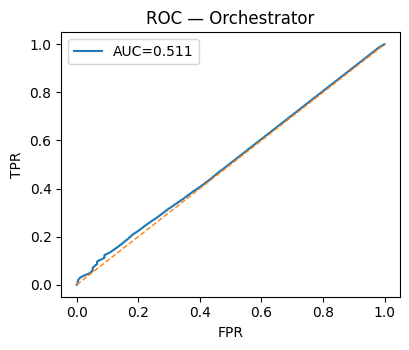

In [42]:
# STEP 1 — Evaluation (needs df_emails with 'text' and any label column)
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Build df_eval (normalize labels to 0/1)
lab_cols = [c for c in df_emails.columns if c.lower() in ("label","labels","target","is_spam","is_phishing")]
assert lab_cols, "No label column found in df_emails"
lab_col = lab_cols[0]

def to01(v):
    try:
        return int(float(v) >= 0.5)
    except:
        return 1 if str(v).strip().lower() in ("spam","phish","phishing","1","true") else 0

df_eval = df_emails.loc[df_emails[lab_col].notna(), ["text", lab_col]].copy()
df_eval["y"] = df_eval[lab_col].apply(to01).astype(int)

# Score with your orchestrator
preds, probs, stages = [], [], []
for txt in tqdm(df_eval["text"].astype(str).tolist()):
    stage, p, _ = orchestrate_email(txt)
    preds.append(1 if p >= 0.5 else 0)
    probs.append(p)
    stages.append(stage)

df_eval["y_pred"] = preds
df_eval["p"] = probs
df_eval["stage"] = stages

print(classification_report(df_eval["y"], df_eval["y_pred"], target_names=["legit","phish"]))
cm = confusion_matrix(df_eval["y"], df_eval["y_pred"])
print("Confusion matrix:\n", cm)
try:
    print("ROC-AUC:", roc_auc_score(df_eval["y"], df_eval["p"]))
except:
    pass

# ROC curve
fpr, tpr, _ = roc_curve(df_eval["y"], df_eval["p"])
auc_ = roc_auc_score(df_eval["y"], df_eval["p"])
plt.figure(figsize=(4.2,3.6))
plt.plot(fpr, tpr, label=f"AUC={auc_:.3f}")
plt.plot([0,1],[0,1],"--",lw=1)
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC — Orchestrator"); plt.legend(); plt.tight_layout(); plt.show()


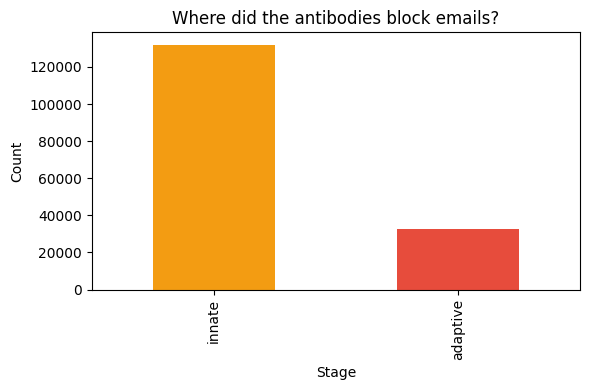

,count
stage,
innate,132058
adaptive,32914


In [43]:
# STEP 2 — Where blocked
import matplotlib.pyplot as plt

stage_counts = df_eval["stage"].value_counts()
plt.figure(figsize=(6,4))
stage_counts.plot(kind="bar", color=["#f39c12","#e74c3c","#2ecc71","#95a5a6"])
plt.title("Where did the antibodies block emails?")
plt.xlabel("Stage"); plt.ylabel("Count"); plt.tight_layout(); plt.show()
stage_counts


In [44]:
by_src = df_eval.groupby(["stage"]).size()
print(by_src)


stage
adaptive     32914
innate      132058
dtype: int64


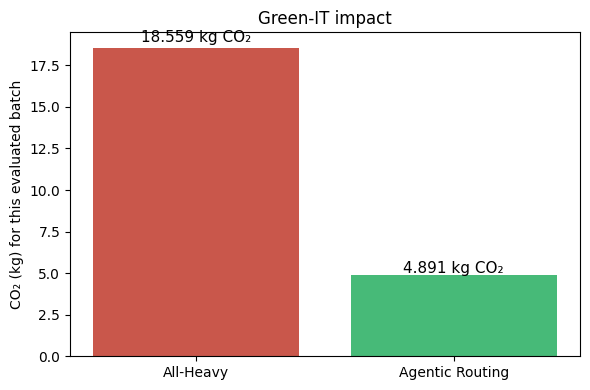

Escalation rate: 20.0%  |  CO₂ saved: 73.6%


In [45]:
# STEP 3 — Green IT energy & CO₂ (toy but consistent)
N = len(df_eval)
# assume: light (innate) 0.02 Wh, adaptive 0.25 Wh; grid factor 0.45 kg/kWh
wh_light, wh_heavy = 0.02, 0.25
ef = 0.45/1000.0

# Estimate escalation rate from stages:
p_escalate = (df_eval["stage"]=="adaptive").mean()

energy_all_heavy = N*wh_heavy
energy_agentic   = N*((1-p_escalate)*wh_light + p_escalate*wh_heavy)
co2_all_heavy = energy_all_heavy*ef
co2_agentic   = energy_agentic*ef

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.bar(["All-Heavy","Agentic Routing"], [co2_all_heavy, co2_agentic], color=["#c0392b","#27ae60"], alpha=0.85)
for i,v in enumerate([co2_all_heavy, co2_agentic]):
    plt.text(i, v*1.02, f"{v:.3f} kg CO₂", ha="center", fontsize=11)
plt.ylabel("CO₂ (kg) for this evaluated batch"); plt.title("Green-IT impact"); plt.tight_layout(); plt.show()

print(f"Escalation rate: {p_escalate*100:.1f}%  |  CO₂ saved: {(1 - co2_agentic/co2_all_heavy)*100:.1f}%")


In [46]:
# STEP 4 — Train TF-IDF + Logistic, then vaccinate with hard negatives
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    df_eval["text"].astype(str), df_eval["y"].values,
    test_size=0.2, random_state=42, stratify=df_eval["y"]
)

tfidf = TfidfVectorizer(max_features=40000, ngram_range=(1,2), min_df=3)
Xtr = tfidf.fit_transform(X_train)
Xte = tfidf.transform(X_test)

lr  = LogisticRegression(max_iter=300, class_weight="balanced")
lr.fit(Xtr, y_train)
base_acc = accuracy_score(y_test, lr.predict(Xte))
print("Baseline TFIDF+LR acc:", round(base_acc,4))

# Safe paraphrases (masked, generic)
import re, numpy as np
SAFE_REPL = [
    ("verify", "confirm"),
    ("reset your password", "update your credentials"),
    ("within 2 hours", "as soon as possible"),
    ("click here", "follow this link"),
    ("account suspended", "access restricted"),
]
def safe_paraphrases(text, k=5):
    outs = {text}
    for a,b in SAFE_REPL:
        if a in text.lower():
            outs.add(re.sub(a, b, text, flags=re.IGNORECASE))
    if "," in text and len(outs)<k:
        outs.add(text.replace(",", " —"))
    return list(outs)[:k]

def mine_hard_negatives(texts, labels, topk=1000):
    scored = []
    for t,y in zip(texts, labels):
        cands = safe_paraphrases(t, k=4)
        if not cands: continue
        Xc = tfidf.transform(cands)
        probs = lr.predict_proba(Xc)[:,1]
        # phishing (1): pick cand with lowest spam prob (confuses model)
        # legit (0):    pick cand with highest spam prob
        idx = np.argmin(probs) if y==1 else np.argmax(probs)
        hardness = abs(0.5 - probs[idx])
        scored.append((hardness, cands[idx], y))
    scored.sort(key=lambda x: x[0], reverse=True)
    hard = scored[:topk]
    X_aug = [t for _,t,_ in hard]
    y_aug = [y for *_,y in hard]
    return X_aug, y_aug

X_aug, y_aug = mine_hard_negatives(X_train.tolist(), y_train.tolist(), topk=1000)
print("Mined hard variants:", len(X_aug))

# Retrain with vaccine set
Xtr2 = tfidf.fit_transform(pd.concat([pd.Series(X_train), pd.Series(X_aug)], ignore_index=True))
ytr2 = np.concatenate([y_train, np.array(y_aug)])
lr2  = LogisticRegression(max_iter=300, class_weight="balanced")
lr2.fit(Xtr2, ytr2)
Xte2 = tfidf.transform(X_test)
acc2 = accuracy_score(y_test, lr2.predict(Xte2))
print("After vaccination acc:", round(acc2,4), "| Δ:", round(acc2-base_acc,4))


Baseline TFIDF+LR acc: 0.7496
Mined hard variants: 1000
After vaccination acc: 0.7496 | Δ: 0.0


In [47]:
!pip install urlextract tldextract

In [48]:
import os, pandas as pd

base_dir = "/content/email_phishing_dataset"  # where you unzipped earlier

csv_files = []
for root, _, files in os.walk(base_dir):
    for f in files:
        if f.lower().endswith(".csv"):
            csv_files.append(os.path.join(root, f))

if not csv_files:
    raise FileNotFoundError(f"❌ No CSV files found under {base_dir}")

dfs = []
for f in csv_files:
    try:
        df_tmp = pd.read_csv(f, encoding="utf-8", on_bad_lines="skip")
        df_tmp["source_file"] = os.path.basename(f)

        # build a 'text' column
        if "text" not in df_tmp.columns:
            possible = [c for c in df_tmp.columns if c.lower() in ["subject","body","message","content","email_text","text_"]]
            if possible:
                df_tmp["text"] = df_tmp[possible].astype(str).agg(" ".join, axis=1)
            else:
                df_tmp["text"] = df_tmp.astype(str).agg(" ".join, axis=1)

        dfs.append(df_tmp)
    except Exception as e:
        print(f"⚠️ Skipping {f}: {e}")

df_emails = pd.concat(dfs, ignore_index=True)
print("✅ Reloaded dataset with", len(df_emails), "rows")
print("Columns:", df_emails.columns.tolist())


✅ Reloaded dataset with 164972 rows
Columns: ['subject', 'body', 'label', 'source_file', 'text', 'text_combined', 'sender', 'receiver', 'date', 'urls']


In [49]:
import pandas as pd
from tqdm import tqdm

# pick the label column if available
lab_cols = [c for c in df_emails.columns if c.lower() in ("label","labels","target","is_spam","is_phishing")]
if lab_cols:
    lab_col = lab_cols[0]
    df_eval = df_emails.loc[df_emails[lab_col].notna(), ["text", lab_col]].copy()
    df_eval = df_eval.rename(columns={lab_col: "y_true"})
else:
    raise ValueError("No label column found in dataset")

# run orchestrator to get predictions
preds, probs, stages = [], [], []
for txt in tqdm(df_eval["text"].astype(str).tolist()):
    stage, p, _ = orchestrate_email(txt)
    preds.append(1 if p >= 0.5 else 0)
    probs.append(p)
    stages.append(stage)

df_eval["y_pred"] = preds
df_eval["p"] = probs
df_eval["stage"] = stages

print("✅ df_eval ready:", df_eval.shape)
print(df_eval.head())


100%|██████████| 164972/164972 [44:22<00:00, 61.97it/s]


✅ df_eval ready: (164972, 5)
                                                text  y_true  y_pred  \
0  job posting - apple-iss research center conten...       0       0   
1  nan lang classification grimes , joseph e . an...       0       1   
2  query : letter frequencies for text identifica...       0       0   
3  risk a colleague and i are researching the dif...       0       0   
4  request book information earlier this morning ...       0       0   

          p     stage  
0  0.496557    innate  
1  0.717754  adaptive  
2  0.095860    innate  
3  0.046904    innate  
4  0.046130    innate  


In [50]:
# Save evaluated predictions and stage attribution
out_eval = "/content/drive/MyDrive/processed/phishing_eval_orchestrator.csv"
df_eval.to_csv(out_eval, index=False)
print("Saved:", out_eval)


Saved: /content/drive/MyDrive/processed/phishing_eval_orchestrator.csv


In [51]:
# === Quarantine simulation ===

QUARANTINE = []

def quarantine_emails(df_eval, threshold=0.8):
    global QUARANTINE
    high_conf = df_eval[df_eval["p"] >= threshold]
    for _, row in high_conf.iterrows():
        record = {
            "text": row["text"],
            "prob": row["p"],
            "stage": row["stage"],
            "domains": context_risk(row["text"])["sample_domains"]
        }
        QUARANTINE.append(record)
        update_memory_from_quarantine(record)  # learn bad domains/phrases

    save_memory()
    return pd.DataFrame(QUARANTINE)

df_quarantine = quarantine_emails(df_eval, threshold=0.8)
print("🚨 Quarantined:", len(df_quarantine))
print(df_quarantine.head())


🚨 Quarantined: 17
                                                text      prob     stage  \
0  basil chupin oztzqpzotpgcomau fred miller wrot...  0.800322  adaptive   
1  newsadminnetabuseemail group uiaregigooglegrou...  0.802701  adaptive   
2  dr daniel solow drdslatinmailcom dr daniel sol...  0.801105  adaptive   
3  mrserick ugo99latinmailcom direct tel882164665...  0.801455  adaptive   
4  [DEJD] DesktopEngineer.com Headlines - $200 Fo...  0.801532  adaptive   

                                             domains  
0                                                 []  
1                                                 []  
2                                                 []  
3                                                 []  
4  [desktopengineer.com, desktopengineer.com, ins...  


GAN / GPT-Style Adversarial Training

In [52]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

gen_model = AutoModelForCausalLM.from_pretrained("gpt2")
gen_tok = AutoTokenizer.from_pretrained("gpt2")

def generate_variants(prompt, num=3, max_len=40):
    inputs = gen_tok.encode(prompt, return_tensors="pt")
    outputs = gen_model.generate(
        inputs,
        max_length=max_len,
        num_return_sequences=num,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=0.8
    )
    return [gen_tok.decode(o, skip_special_tokens=True) for o in outputs]

# Example: generate GAN-like phishing variants
sample = "Reset your password immediately"
print("Variants:", generate_variants(sample, num=3))


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Variants: ["Reset your password immediately, or if you're sure you want to reset your password at any time.\n\nNote: If you're not sure what password your account is on, please visit our", 'Reset your password immediately. It is not possible to change your password after you leave the service. If you would like to remove your password, please check your account settings, then contact us.\n\n', "Reset your password immediately, and then restart the system.\n\nNow, if you're having trouble connecting to your router and trying to reconnect, you can try disabling the default wireless connection and reconnect"]


In [53]:
def explain_decision(text):
    ctx = context_risk(text)
    wm  = watermarkish(text)
    reasons = []
    if ctx["urgent_hits"] > 0: reasons.append("Urgency keywords")
    if ctx["shorteners"] > 0: reasons.append("URL shortener")
    if ctx["suspicious_tlds"] > 0: reasons.append("Suspicious TLD")
    if ctx["brand_spoof_signals"] > 0: reasons.append("Brand spoofing")
    if wm["watermark_like_score"] > 0.3: reasons.append("Watermark-like signals")
    return ", ".join(reasons) or "No strong signals"

df_eval["reason"] = df_eval["text"].apply(explain_decision)
print(df_eval[["text","y_pred","p","reason"]].head())


                                                text  y_pred         p  \
0  job posting - apple-iss research center conten...       0  0.496557   
1  nan lang classification grimes , joseph e . an...       1  0.717754   
2  query : letter frequencies for text identifica...       0  0.095860   
3  risk a colleague and i are researching the dif...       0  0.046904   
4  request book information earlier this morning ...       0  0.046130   

              reason  
0  No strong signals  
1  No strong signals  
2  No strong signals  
3  No strong signals  
4  No strong signals  


In [54]:
def user_feedback(email_text, is_false_positive=True):
    """
    If user marks a legit mail incorrectly quarantined → reduce memory bias.
    """
    doms = context_risk(email_text)["sample_domains"]
    if is_false_positive:
        # remove these domains from memory
        memory["bad_domains"] = [d for d in memory["bad_domains"] if d not in doms]
        for phrase in ["verify your account","reset your password","update payment"]:
            if phrase in email_text.lower():
                if phrase in memory["bad_phrases"]:
                    memory["bad_phrases"].remove(phrase)
    save_memory()
    print("✅ Memory updated after feedback")

# Example use
user_feedback("This is a legit email from mybank.com", is_false_positive=True)


✅ Memory updated after feedback


In [55]:
# Save as app.py
from fastapi import FastAPI
from pydantic import BaseModel

app = FastAPI()

class EmailRequest(BaseModel):
    text: str

@app.post("/scan_email")
def scan_email(req: EmailRequest):
    stage, prob, details = orchestrate_email(req.text)
    reason = explain_decision(req.text)
    verdict = "phish" if prob >= 0.5 else "legit"
    return {
        "verdict": verdict,
        "probability": prob,
        "stage": stage,
        "reason": reason,
        "details": details
    }

# Run: uvicorn app:app --reload


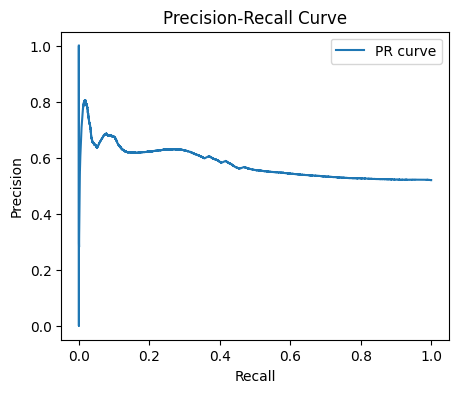

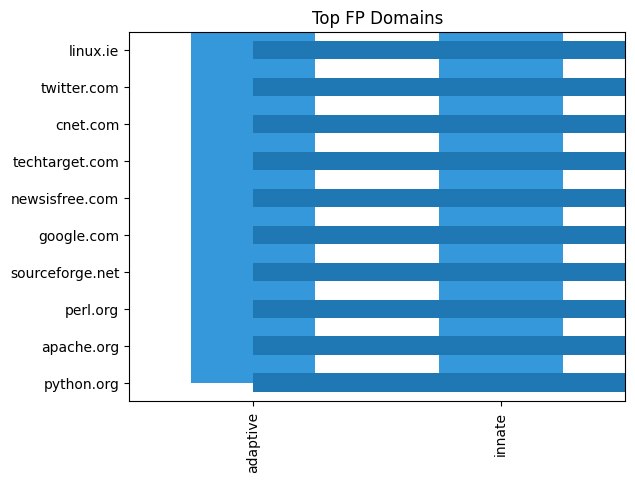

In [57]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall curve
prec, rec, thr = precision_recall_curve(df_eval["y_true"], df_eval["p"])
plt.figure(figsize=(5,4))
plt.plot(rec, prec, label="PR curve")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall Curve"); plt.legend(); plt.show()

# Stage distribution
stage_counts = df_eval["stage"].value_counts()
stage_counts.plot(kind="bar", title="Detection stage distribution", color="#3498db")

# False positives — analyze by domain
fps = df_eval[(df_eval["y_true"]==0) & (df_eval["y_pred"]==1)]
fp_domains = []
for txt in fps["text"].tolist():
    fp_domains.extend(context_risk(txt)["sample_domains"])
fp_counts = pd.Series(fp_domains).value_counts().head(10)
fp_counts.plot(kind="barh", title="Top FP Domains")
plt.show()


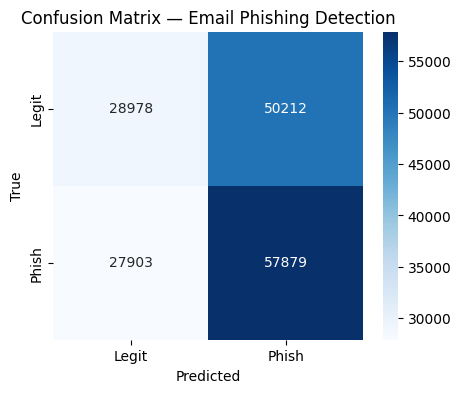

In [58]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df_eval["y_true"], df_eval["y_pred"])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Legit","Phish"], yticklabels=["Legit","Phish"])
plt.xlabel("Predicted"); plt.ylabel("True")
plt.title("Confusion Matrix — Email Phishing Detection")
plt.show()


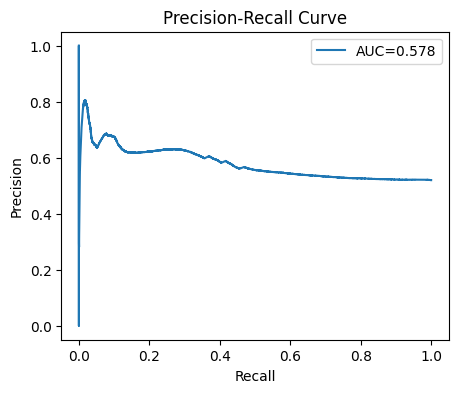

In [59]:
from sklearn.metrics import precision_recall_curve, auc

prec, rec, _ = precision_recall_curve(df_eval["y_true"], df_eval["p"])
pr_auc = auc(rec, prec)
plt.figure(figsize=(5,4))
plt.plot(rec, prec, label=f"AUC={pr_auc:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(); plt.show()


/tmp/ipython-input-3910963928.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eval, x="stage", palette="Set2")


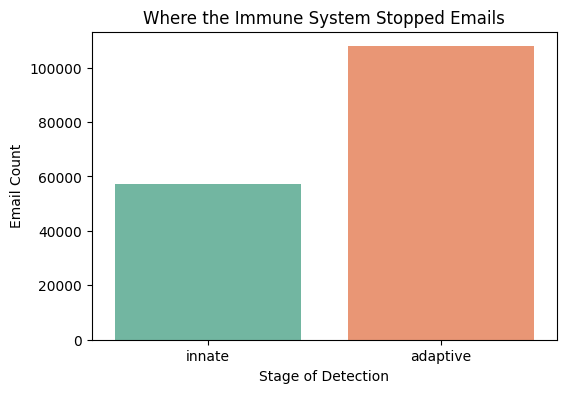

In [60]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_eval, x="stage", palette="Set2")
plt.title("Where the Immune System Stopped Emails")
plt.xlabel("Stage of Detection"); plt.ylabel("Email Count")
plt.show()


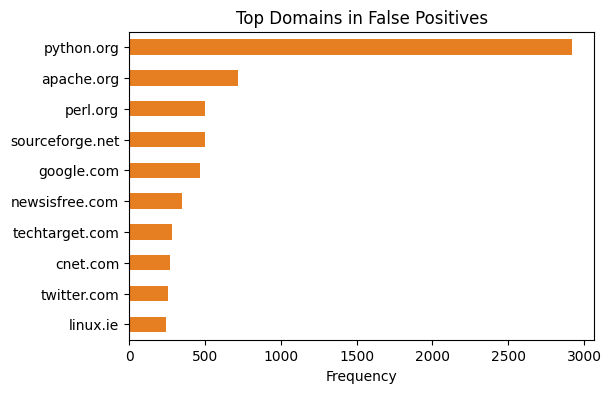

In [61]:
fp_domains = []
for txt in df_eval.loc[(df_eval["y_true"]==0)&(df_eval["y_pred"]==1), "text"]:
    fp_domains.extend(context_risk(txt)["sample_domains"])

fp_counts = pd.Series(fp_domains).value_counts().head(10)

plt.figure(figsize=(6,4))
fp_counts.plot(kind="barh", color="#e67e22")
plt.gca().invert_yaxis()
plt.title("Top Domains in False Positives")
plt.xlabel("Frequency")
plt.show()


Real phishing rows: 500
GAN-like variants: 255
Final sizes -> real: 500  | gan: 500


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


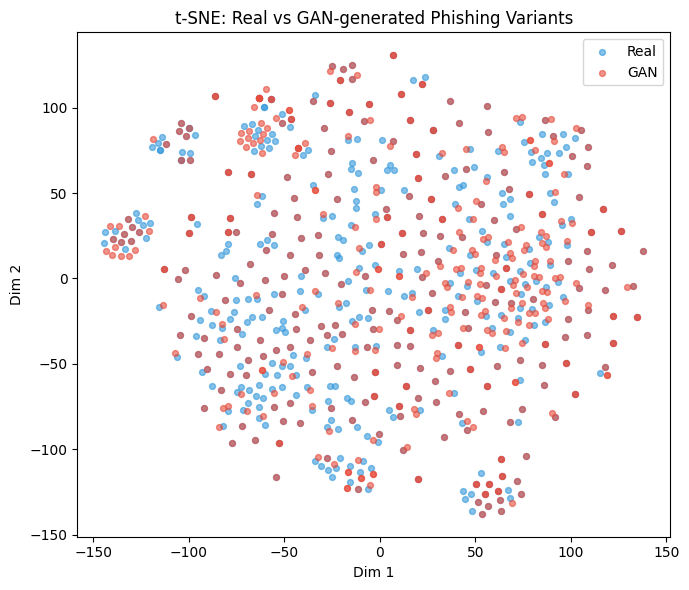

In [66]:
# ==== 0) Prereqs: needs df_eval with ["text","y_true"] ====
# If you don't have df_eval in memory, rebuild quickly:
# (skip if it's already there)
if "df_eval" not in globals():
    import os, pandas as pd
    base_dir = "/content/email_phishing_dataset"
    csvs = []
    for r,_,fs in os.walk(base_dir):
        for f in fs:
            if f.lower().endswith(".csv"):
                csvs.append(os.path.join(r,f))
    dfs = []
    for f in csvs:
        try:
            d = pd.read_csv(f, encoding="utf-8", on_bad_lines="skip")
            if "text" not in d.columns:
                possible = [c for c in d.columns if c.lower() in ["subject","body","message","content","email_text","text_"]]
                d["text"] = d[possible].astype(str).agg(" ".join, axis=1) if possible else d.astype(str).agg(" ".join, axis=1)
            dfs.append(d)
        except Exception as e:
            print("skip", f, e)
    df_emails = pd.concat(dfs, ignore_index=True)
    # find a label column & normalize to 0/1
    lab_cols = [c for c in df_emails.columns if c.lower() in ("label","labels","target","is_spam","is_phishing")]
    assert lab_cols, "No label column found"
    lab_col = lab_cols[0]
    def to01(v):
        try:
            return int(float(v) >= 0.5)
        except:
            return 1 if str(v).strip().lower() in ("spam","phish","phishing","1","true") else 0
    df_eval = df_emails.loc[df_emails[lab_col].notna(), ["text", lab_col]].copy()
    df_eval = df_eval.rename(columns={lab_col:"y_true"})
    df_eval["y_true"] = df_eval["y_true"].apply(to01).astype(int)
    print("✅ rebuilt df_eval:", df_eval.shape)

# ==== 1) Build df_real (true phishing samples) ====
import pandas as pd
N_PER_CLASS = 500  # target count for each group in the plot
df_real = df_eval[df_eval["y_true"]==1][["text"]].dropna().sample(
    n=min(N_PER_CLASS, df_eval["y_true"].eq(1).sum()), random_state=42
).reset_index(drop=True)

print("Real phishing rows:", len(df_real))

# ==== 2) Build df_gan: safe paraphrases or GPT-2 variants ====
# A) fast + safe paraphraser (no downloads) – recommended
import re, numpy as np
SAFE_REPL = [
    ("verify your account", "confirm your account"),
    ("reset your password", "update your credentials"),
    ("within 2 hours", "as soon as possible"),
    ("click here", "follow this link"),
    ("account suspended", "access restricted"),
    ("login now", "sign in now"),
    ("confirm your identity", "validate your identity"),
]
def safe_paraphrases(text, k=3):
    outs = {text}
    low = text.lower()
    for a,b in SAFE_REPL:
        if a in low and len(outs) < k+1:
            outs.add(re.sub(a, b, text, flags=re.IGNORECASE))
    # minor neutral tweaks
    if "," in text and len(outs) < k+1:
        outs.add(text.replace(",", " —"))
    if "immediately" in low and len(outs) < k+1:
        outs.add(re.sub("immediately", "right away", text, flags=re.IGNORECASE))
    return list(outs)[:k]

# B) Optional GPT-2 generator (set to True to try)
USE_GPT2 = False
if USE_GPT2:
    try:
        from transformers import AutoModelForCausalLM, AutoTokenizer
        import torch
        gen_model = AutoModelForCausalLM.from_pretrained("gpt2")
        gen_tok   = AutoTokenizer.from_pretrained("gpt2")
        def gpt2_variants(prompt, num=2, max_len=56):
            inp = gen_tok.encode(prompt, return_tensors="pt")
            out = gen_model.generate(
                inp, max_length=max_len, num_return_sequences=num,
                do_sample=True, top_k=50, top_p=0.95, temperature=0.8
            )
            return [gen_tok.decode(o, skip_special_tokens=True) for o in out]
    except Exception as e:
        print("⚠️ GPT-2 not available, using safe paraphrases only:", e)
        USE_GPT2 = False

# Build df_gan
gan_texts = []
for t in df_real["text"].tolist():
    cands = safe_paraphrases(t, k=3)
    if USE_GPT2:
        try:
            cands += gpt2_variants(t, num=1)
        except Exception:
            pass
    # keep only slightly different variants
    uniq = []
    seen = set()
    for c in cands:
        c_norm = re.sub(r"\s+", " ", c.strip())
        if c_norm and c_norm not in seen and c_norm.lower()!=t.lower():
            uniq.append(c_norm); seen.add(c_norm)
    if uniq:
        gan_texts.append(np.random.choice(uniq))
    if len(gan_texts) >= N_PER_CLASS:
        break

df_gan = pd.DataFrame({"text": gan_texts})
print("GAN-like variants:", len(df_gan))

# If too few variants generated, top up by reusing safe paraphrases:
while len(df_gan) < len(df_real):
    extra = []
    for t in df_real["text"].sample(frac=0.5, random_state=7).tolist():
        sp = safe_paraphrases(t, k=2)
        if sp:
            extra.append(sp[-1])
        if len(extra) + len(df_gan) >= len(df_real):
            break
    if not extra: break
    df_gan = pd.concat([df_gan, pd.DataFrame({"text": extra})], ignore_index=True)

df_gan = df_gan.sample(n=min(len(df_gan), len(df_real)), random_state=42).reset_index(drop=True)
print("Final sizes -> real:", len(df_real), " | gan:", len(df_gan))

# ==== 3) Vectorize + t-SNE (robust) ====
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

texts = df_real["text"].tolist() + df_gan["text"].tolist()
labels = (["Real"]*len(df_real)) + (["GAN"]*len(df_gan))

vec = TfidfVectorizer(max_features=2000)
X = vec.fit_transform(texts).toarray()

# Pick a valid perplexity (< n_samples)
n_samples = X.shape[0]
perp = 30 if n_samples > 100 else max(5, min(20, n_samples//3))

try:
    tsne = TSNE(n_components=2, random_state=42, perplexity=perp, n_iter=1000)
    X_emb = tsne.fit_transform(X)
except Exception as e:
    print("⚠️ t-SNE fallback to PCA:", e)
    X_emb = PCA(n_components=2, random_state=42).fit_transform(X)

# ==== 4) Plot ====
import pandas as pd
df_plot = pd.DataFrame(X_emb, columns=["x","y"])
df_plot["label"] = labels

plt.figure(figsize=(7,6))
for lab, col in (("Real", "#3498db"), ("GAN","#e74c3c")):
    sub = df_plot[df_plot["label"]==lab]
    plt.scatter(sub["x"], sub["y"], c=col, alpha=0.6, label=lab, s=18)
plt.legend()
plt.title("t-SNE: Real vs GAN-generated Phishing Variants")
plt.xlabel("Dim 1"); plt.ylabel("Dim 2")
plt.tight_layout()
plt.show()


Augmented samples: 131977


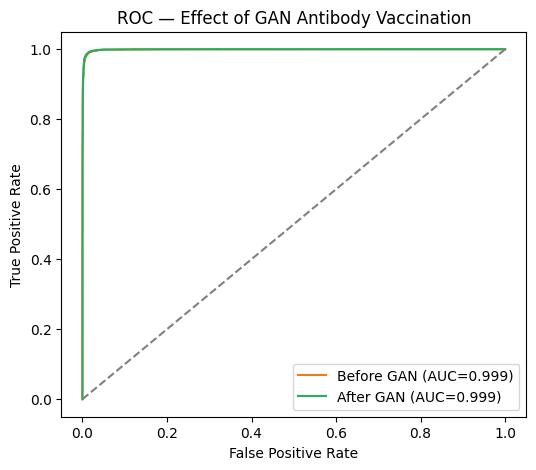

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ===== 1) Split your dataset =====
X_train, X_test, y_train, y_test = train_test_split(
    df_eval["text"].astype(str),
    df_eval["y_true"].values,
    test_size=0.2, random_state=42, stratify=df_eval["y_true"]
)

# ===== 2) Baseline TF-IDF + Logistic Regression =====
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2), min_df=3)
Xtr = tfidf.fit_transform(X_train)
Xte = tfidf.transform(X_test)

clf_base = LogisticRegression(max_iter=300, class_weight="balanced")
clf_base.fit(Xtr, y_train)

y_probs_before = clf_base.predict_proba(Xte)[:,1]

# ===== 3) Generate GAN-like "vaccine" samples =====
def safe_paraphrases(text, k=2):
    SAFE_REPL = [
        ("verify your account", "confirm your account"),
        ("reset your password", "update your credentials"),
        ("within 2 hours", "as soon as possible"),
        ("click here", "follow this link"),
        ("account suspended", "access restricted"),
    ]
    outs = {text}
    for a,b in SAFE_REPL:
        if a in text.lower() and len(outs)<k+1:
            outs.add(text.replace(a,b))
    return list(outs)[:k]

X_aug, y_aug = [], []
for t,y in zip(X_train.tolist(), y_train.tolist()):
    cands = safe_paraphrases(t)
    if cands:
        # phishing (1): keep variants that look more legit (confuse model)
        if y==1:
            X_aug.append(cands[-1]); y_aug.append(1)
        # legit (0): keep variants that look more phishy
        else:
            X_aug.append(cands[0]); y_aug.append(0)

print("Augmented samples:", len(X_aug))

# ===== 4) Retrain with vaccination =====
Xtr2 = tfidf.fit_transform(pd.concat([pd.Series(X_train), pd.Series(X_aug)], ignore_index=True))
ytr2 = np.concatenate([y_train, np.array(y_aug)])

clf_vac = LogisticRegression(max_iter=300, class_weight="balanced")
clf_vac.fit(Xtr2, ytr2)

Xte2 = tfidf.transform(X_test)
y_probs_after = clf_vac.predict_proba(Xte2)[:,1]

# ===== 5) ROC Curves Before vs After =====
fpr1,tpr1,_ = roc_curve(y_test, y_probs_before)
fpr2,tpr2,_ = roc_curve(y_test, y_probs_after)

plt.figure(figsize=(6,5))
plt.plot(fpr1, tpr1, label=f"Before GAN (AUC={roc_auc_score(y_test, y_probs_before):.3f})", color="#e67e22")
plt.plot(fpr2, tpr2, label=f"After GAN (AUC={roc_auc_score(y_test, y_probs_after):.3f})", color="#27ae60")
plt.plot([0,1],[0,1],"--",c="gray")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC — Effect of GAN Antibody Vaccination")
plt.legend()
plt.show()


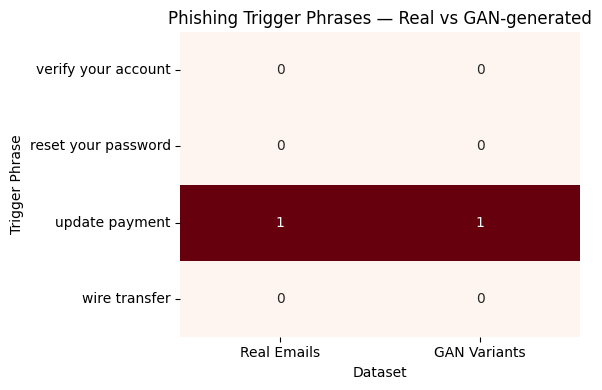

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Define phrases of interest
phrases = ["verify your account", "reset your password", "update payment", "wire transfer"]

# ✅ Count occurrences in real vs GAN datasets
counts_real = [df_real["text"].str.contains(p, case=False, na=False).sum() for p in phrases]
counts_gan  = [df_gan["text"].str.contains(p, case=False, na=False).sum() for p in phrases]

# ✅ Build DataFrame
df_phr = pd.DataFrame({
    "Real Emails": counts_real,
    "GAN Variants": counts_gan
}, index=phrases)

# ✅ Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df_phr, annot=True, cmap="Reds", fmt="d", cbar=False)
plt.title("Phishing Trigger Phrases — Real vs GAN-generated")
plt.ylabel("Trigger Phrase")
plt.xlabel("Dataset")
plt.tight_layout()
plt.show()
